<a href="https://www.kaggle.com/code/sayedshaun/digit-recognizer-cnn?scriptVersionId=141008282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sample_df = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [3]:
x_train = train_df.drop(["label"], axis = 1).to_numpy()/255
y_train = train_df["label"].to_numpy()
x_test = test_df.to_numpy()/255

In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

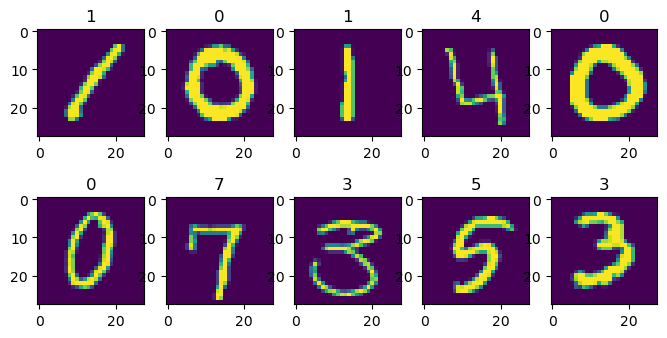

In [6]:
plt.figure(figsize=[8,4])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [7]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.regularizers import *


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), padding="valid", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2), strides=None),
    Dropout(0.2),
    
    Conv2D(128, kernel_size=(3,3), padding="valid"),
    MaxPooling2D(pool_size=(2,2), strides=None),
    Dropout(0.1),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(64, activation = "relu"),
    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

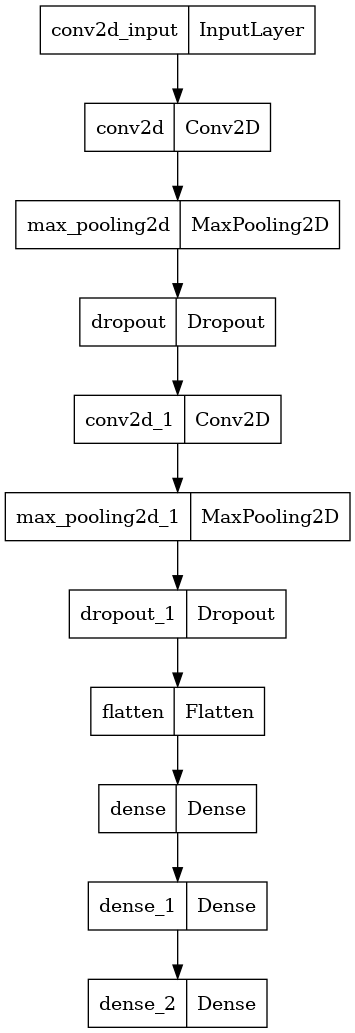

In [9]:
from keras.utils import plot_model
plot_model(model)

In [10]:
model.compile(
    optimizer= Adam(),
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [11]:
hist = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1050/1050 [==============================] - 46s 43ms/step - loss: 0.2126 - accuracy: 0.9344 - val_loss: 0.0695 - val_accuracy: 0.9774
Epoch 2/20
1050/1050 [==============================] - 44s 42ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0614 - val_accuracy: 0.9821
Epoch 3/20
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 4/20
1050/1050 [==============================] - 47s 44ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 5/20
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 6/20
1050/1050 [==============================] - 45s 42ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0645 - val_accuracy: 0.9832
Epoch 7/20
1050/1050 [==============================] - 44s 42ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0545 - val_accura

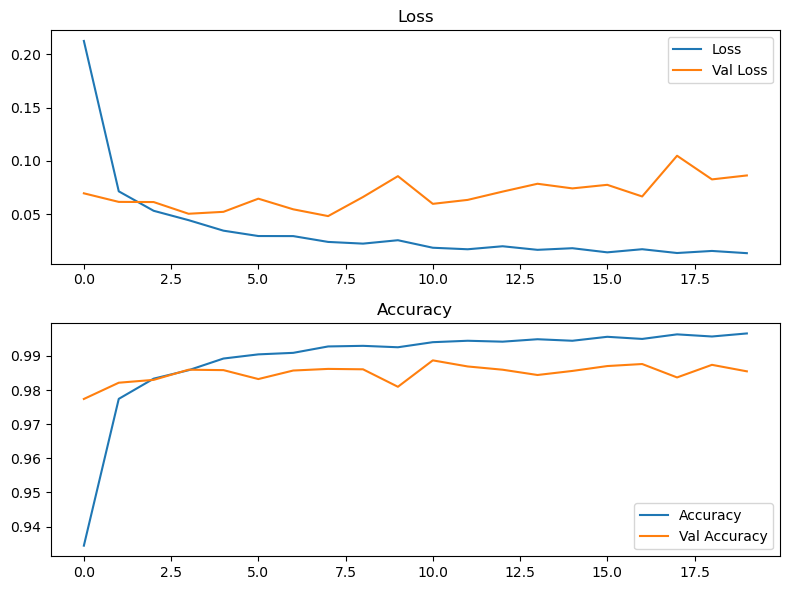

In [12]:
plt.figure(figsize=[8, 6])
plt.subplot(2,1,1)
plt.plot(hist.history["loss"], label="Loss",)
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist.history["accuracy"], label="Accuracy")
plt.plot(hist.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
predict = model.predict(x_test)
y_pred = np.argmax(predict,axis = 1)

result = pd.Series(y_pred,name="Label")
result

875/875 [==============================] - 10s 11ms/step


0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [14]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
submission.to_csv("submission.csv",index=False)